In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
from matplotlib import pyplot as plt
import random

In [5]:
def Read_data(filename, feature):
    data = pd.read_csv(filename)
    X = data[feature]
    return X

def Gaussian_kernel(x, mu = 0, sigma = 1):
    return np.exp(-0.5*(((x-mu)/sigma)**2))/(sigma*np.sqrt(2*np.pi))

def Kernel_sum(x, X, h):
    sum = 0
    for i in range(len(X)):
        sum += Gaussian_kernel((x-X[i])/h)
    return sum

def Parzen_window(X, h):
    n = len(X)
    p = [None] * n
    for i in range(n):
        p[i] = (1/(n*h))*Kernel_sum(X[i], X, h)
        if (i * 10) % n == 0:
            print(int((i*100)/n), "% data processed!")
    return p

In [6]:
X = Read_data("ted_main.csv", "duration")
X = X.sort_values()
X = np.array(X).reshape(len(X), 1)

0 % data processed!
10 % data processed!
20 % data processed!
30 % data processed!
40 % data processed!
50 % data processed!
60 % data processed!
70 % data processed!
80 % data processed!
90 % data processed!


Text(0.5, 1.0, 'parzen window(h=10)')

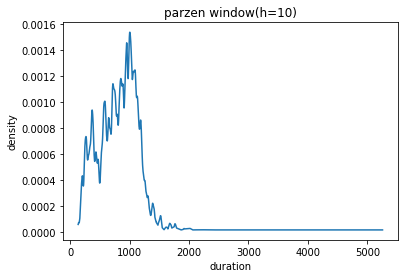

In [19]:
P = Parzen_window(X, h = 10)
plt.plot(X, P)
plt.xlabel("duration")
plt.ylabel("density")
plt.title("parzen window(h=10)")

0 % data processed!
10 % data processed!
20 % data processed!
30 % data processed!
40 % data processed!
50 % data processed!
60 % data processed!
70 % data processed!
80 % data processed!
90 % data processed!


Text(0.5, 1.0, 'parzen window(h=20)')

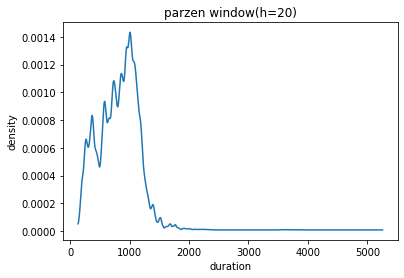

In [18]:
P = Parzen_window(X, h = 20)
plt.plot(X, P)
plt.xlabel("duration")
plt.ylabel("density")
plt.title("parzen window(h=20)")

0 % data processed!
10 % data processed!
20 % data processed!
30 % data processed!
40 % data processed!
50 % data processed!
60 % data processed!
70 % data processed!
80 % data processed!
90 % data processed!


Text(0.5, 1.0, 'parzen window(h=50)')

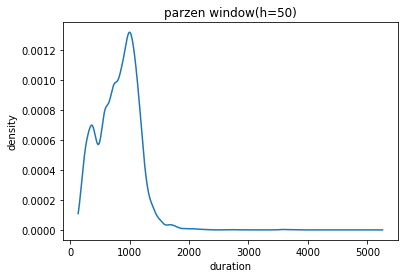

In [20]:
P = Parzen_window(X, h = 50)
plt.plot(X, P)
plt.xlabel("duration")
plt.ylabel("density")
plt.title("parzen window(h=50)")

0 % data processed!
10 % data processed!
20 % data processed!
30 % data processed!
40 % data processed!
50 % data processed!
60 % data processed!
70 % data processed!
80 % data processed!
90 % data processed!


Text(0.5, 1.0, 'parzen window(h=100)')

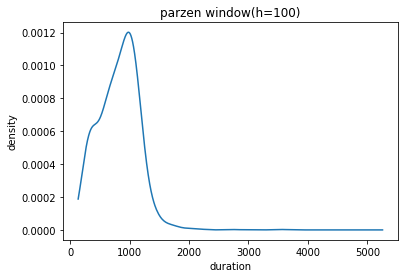

In [21]:
P = Parzen_window(X, h = 100)
plt.plot(X, P)
plt.xlabel("duration")
plt.ylabel("density")
plt.title("parzen window(h=100)")

Text(0.5, 1.0, 'parzen window(using lib)')

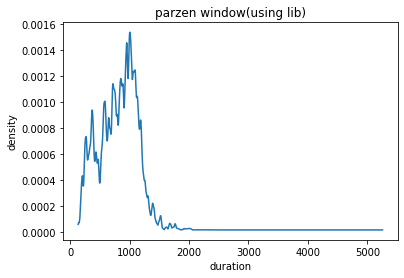

In [16]:
model = KernelDensity(bandwidth=10,kernel="gaussian").fit(X)
dens = model.score_samples(X)
plt.plot(X,np.exp(dens))
plt.xlabel("duration")
plt.ylabel("density")
plt.title("parzen window(using lib)")

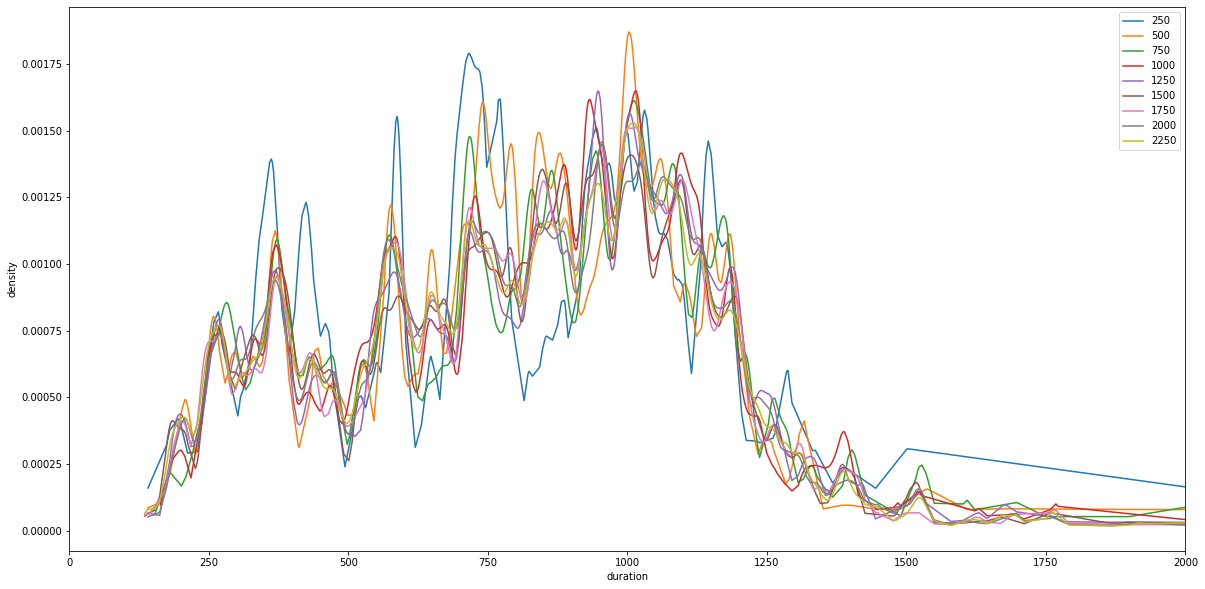

In [8]:
figure, axis = plt.subplots()
axis.set_xlabel('duration')
axis.set_ylabel('density')
axis.set_xlim([0, 2000])

random.seed(42)
for i in range(1,len(X)//250):
    x = random.sample(sorted(X), k = 250*i)
    x.sort()
    x = np.array(x).reshape(len(x),1)
    model = KernelDensity(bandwidth=10,kernel="gaussian",).fit(x)
    dens = model.score_samples(x) 
    axis.plot(x,np.exp(dens), label = str(i*250))
axis.legend()  
plt.show()